# Model

In [51]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [52]:
df_clean = pd.read_csv("data/df.csv")

In [53]:
df_longitude = pd.read_csv('data/df_longitude.csv')

In [54]:
df_longitude

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0,0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0,1
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0,0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0,0


In [55]:
df_lon_sample = df_longitude.sample(n = 7000, random_state = 1) 

In [56]:
df_clean 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
0,-0.448351,3.604682,1.791759,7.524561,6.159095,7.242082,6.033086,0.393190,11.184421,0,1,0,0,0,0
1,-0.446053,3.516904,2.079442,7.616776,5.855072,6.759255,5.828946,1.933447,12.521248,1,0,0,0,0,0
2,-0.448740,3.600048,3.218876,6.774224,5.365976,6.836259,5.365976,0.440575,10.973357,0,1,0,0,0,0
3,-0.446644,3.529297,3.433987,6.432940,5.433722,6.391917,5.424950,0.424221,12.206073,1,0,0,0,0,0
4,-0.449887,3.632045,3.044522,7.561122,5.921578,7.029973,5.918894,1.406465,11.677592,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.450619,3.678577,2.995732,7.289611,5.627621,6.613384,5.521461,1.119232,11.448920,0,1,0,0,0,0
16508,-0.450999,3.640477,3.891820,7.768533,6.222576,7.030857,6.126869,0.960614,11.543455,0,0,0,1,0,1
16509,-0.449876,3.661508,2.944439,7.836370,6.133398,7.095064,6.061457,1.503144,12.168371,0,1,0,0,0,0
16510,-0.446440,3.531055,3.663562,7.928766,6.733402,7.842279,6.650279,0.945850,11.941456,1,0,0,0,0,0


In [57]:
df_sample = df_clean.sample(n = 7000, random_state = 1)

In [58]:
# df_sp = df_sample.drop(["index", "latitude", "longitude"], axis = 1)

## define predictor and outcomes variables 

In [59]:
X = df_sample.drop(["median_house_value"], axis = 1)
y = df_sample["median_house_value"]

## Create linear regression baseline model

In [60]:
import statsmodels.api as sm

X = sm.add_constant(X)

Cross_val_score 

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Create a linear regression object
reg = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(reg, X, y, cv=5)
scores_1 = np.sqrt(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))

# Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("RMSE: ", scores_1.mean())

Accuracy: 0.70 (+/- 0.02)
RMSE:  0.31322088725052605


In [62]:
# Train test split 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Linear regression model

model = sm.OLS(train_y, train_X)
model = model.fit()
print(model.summary2())

                     Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:      0.695    
Dependent Variable:    median_house_value  AIC:                 2935.5624
Date:                  2023-02-02 11:45    BIC:                 3028.3897
No. Observations:      5600                Log-Likelihood:      -1453.8  
Df Model:              13                  F-statistic:         982.0    
Df Residuals:          5586                Prob (F-statistic):  0.00     
R-squared:             0.696               Scale:               0.098651 
-------------------------------------------------------------------------
                     Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------------
const               -27.9360   2.2346 -12.5018 0.0000  -32.3166  -23.5554
longitude          -147.5149   8.5766 -17.1996 0.0000 -164.3284 -130.7014
latitude             -5.8094   0.3430 -16.9358 0.0000   -6.

Info : 

- no.observation is 10547 (80% of the overall dataset)
- R-squared (goodness of the model from 0 to 1) is 0.631
- p-value >0.05 for some predictors: meaning that we would consider removing these variables from the predictors list! It is because p-values determine whether the relationships that we observe in this sample also exist in the larger population.

### Predict on test set

We will use model.predict on the test_X and compare the predictions with the actual test_y values.

In [63]:
predictions = model.predict(test_X)

df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predictions})

In [64]:
df_results

,Actual,Predicted
2590,12.031719,11.928945
15050,12.474190,12.607998
14865,12.720093,12.435045
13333,11.949889,11.911354
14519,11.016988,11.589779
...,...,...
2463,12.399581,12.500691
15023,11.463735,11.833548
6164,12.396280,12.541789
2943,12.299563,11.906142


### Evaluate the model 

Let's find RMSE and R2 

In [65]:
from sklearn.metrics import r2_score, mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_y, predictions))
# unscaled_rmse = np.sqrt(mean_squared_error(y_test_1, y_pred))

r2 = r2_score(test_y, predictions)
print('RMSE:', RMSE, 'R2 :', r2, 'RMSE unscaled:', RMSE)

RMSE: 0.30736957300869466 R2 : 0.7032685873732727 RMSE unscaled: 0.30736957300869466


## RANSAC regression model 

In [66]:
X = df_sample.drop(["median_house_value"], axis = 1)
y = df_sample["median_house_value"]

In [67]:
from sklearn.linear_model import RANSACRegressor

In [68]:
# Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [69]:
# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
max_trials=10, # Number of Iterations
min_samples=2000, # Minimum size of the sample
loss='absolute_loss', # Metrics for loss
residual_threshold=10 # Threshold
)

# Train model
ransac.fit(X_train, y_train)

# Model prediction
y_pred = ransac.predict(X_test)
y_range = np.ptp(y_test)
rmse = mean_squared_error(y_test, y_pred)
# Unscale the RMSE by taking the exponential of the log-transformed RMSE
unscaled_rmse = np.exp(rmse)
# Evaluate the model 
print('RMSE:', rmse)
print('RMSE unscaled:', unscaled_rmse)
print('R²:', r2_score(y_test, y_pred))

RMSE: 0.09447605441154366
RMSE unscaled: 1.0990828446324084
R²: 0.7032685873732841


In [70]:
import numpy as np
from sklearn.metrics import mean_squared_error

X_1 = df_lon_sample.drop(["median_house_value"], axis =1)
y_1 = df_lon_sample["median_house_value"]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size = 0.8, random_state = 42)

def inverse_log_transformation(np):
    df = pd.DataFrame(np)
    print(type(df))
    numeric_cols = df.select_dtypes(include = "float64", exclude = 'int64').columns
    for col in numeric_cols:
        is_negative = df[col] < 0
        df[col] = np.exp(abs(df[col]))
        df[col] = df[col] * (-1 if is_negative else 1)
    return df


# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
max_trials=10, # Number of Iterations
min_samples=2000, # Minimum size of the sample
loss='absolute_loss', # Metrics for loss
residual_threshold=10 # Threshold
)

# Train model
ransac.fit(X_train, y_train)

# Model prediction
y_pred_log = ransac.predict(X_test)

# Inverse log transform of predictions
y_pred = np.exp(y_pred_log)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred))

# Evaluate the model 
print('RMSE:', rmse)
print('R²:', r2_score(y_test_1, y_pred))

RMSE: 63162.800091250676
R²: 0.688420706512209


## Random Forest

In [81]:
X = df_sample.drop(["median_house_value"], axis = 1)
y = df_sample["median_house_value"]

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error


forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest_regressor.fit(X, y)

scores = cross_validate(forest_regressor, X, y, cv=7)
predictions = forest_regressor.predict(X)
predictions_original_scale = np.exp(predictions)
y_original_scale = np.exp(y)
average_r2=scores['test_score'].mean()
rmse = np.sqrt(mean_squared_error(y_original_scale, predictions_original_scale))
mae = mean_absolute_error(y_original_scale, predictions_original_scale)
print(" R2: ", average_r2, "//  RMSE: ", average_rmse, "//  MAE:", average_mae) 

 R2:  0.8091391586934132 //  RMSE:  21400.801809869834 //  MAE: 12735.022693507624


I see that my RMSE decrease well with the RANSAC regression model

## Model assumptions

Before we built a linear regression model, we make the following assumptions:

- Linearity: The relationship between X and the mean of Y is linear.
- Normality: The residuals follow a normal distribution and the expected mean of the residuals is zero.
- Homoscedasticity: The variance of residual is constant for all values of X.
- No autocorrelation: Residuals are independent of each other.
- No multicollinearity: There is no high correlation between predictor variables.

### Linearity

We will test linearity with a scatter plot to see predicted values versus the actual values. Ideally, the data points should lie around the diagonal line on the plot.

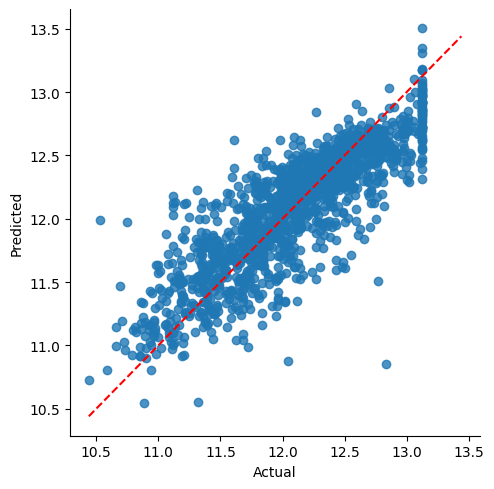

In [73]:
# Plot the actual vs predicted results
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plot the diagonal line 
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In my dataset, i can see that there is not a perfect relashionship. On the lower values our predictions are biased 

### Normality

We will test normality by checking with the quantile-quantile plot, Q-Q plot.

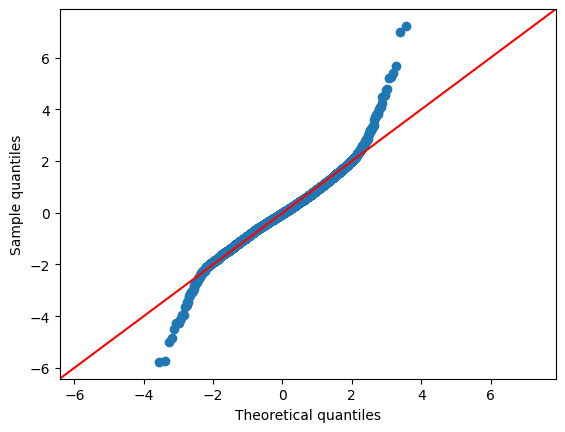

In [74]:
from statsmodels.graphics.gofplots import qqplot 

fig = qqplot(model.resid_pearson, line = '45', fit = 'True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

We can see that our model biasing

### Homoscedasticity

We will test homoscedasticity by plotting the residuals and checking if the variance is uniform.

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


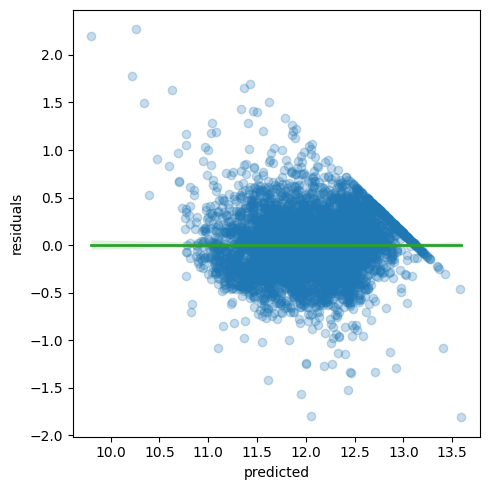

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

We can say that the distribution of our residuals is not completely uniform.

### No Autocorrelation

We will perform the Durbin-Watson test to determine if the no autocorrelation assumption holds.

In [76]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(model.resid)
print("Durbin-Watson:", durbinWatson)

Durbin-Watson: 1.984480414371919


The Durbin-Watson statistic ranges between 0 and 4 : 
- A value of 2.0 means that there is no autocorrelation. 
- Values between 0 and 2 indicate positive 
- values between 2 and 4 indicate negative autocorrelation. 

In our case, Durbin-Watson statistic is very close to 2.0 therefore we can say that no autocorrelation assumption is not violated.

### No Multicolinearity

We will plot a heatmap to see the correlation between predictors visually and we will also calculate the variance inflation factor (VIF), which measures the multicollinearity among the independent variables.

In [77]:
mask = np.zeros_like(train_X.drop("const", axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_X.drop("const", axis=1).corr().round(2), annot=True, mask=mask, cmap="cividis")

<AxesSubplot:>

And we calculate VIF:

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(X.columns)):
    v=vif(np.matrix(X),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,2)))

Variance inflation factor for longitude: 20.84
Variance inflation factor for latitude: 23.3
Variance inflation factor for housing_median_age: 1.29
Variance inflation factor for total_rooms: 23.77
Variance inflation factor for total_bedrooms: 33.45
Variance inflation factor for population: 8.46
Variance inflation factor for households: 32.03
Variance inflation factor for median_income: 2.63
Variance inflation factor for _<1H OCEAN: 181182.8
Variance inflation factor for _INLAND: 130738.09
Variance inflation factor for _ISLAND: 119.65
Variance inflation factor for _NEAR BAY: 46169.32
Variance inflation factor for _NEAR OCEAN: 53852.78
Variance inflation factor for outlier: 3.07


Info : 
- A VIF of 1 indicates two variables are not correlated
- A VIF between 1 and 5 indicates a moderate correlation 
- And a VIF above 5 indicates a high correlation.

As result shows we have 5 high correlated and 2 moderately correlated variables. It is better if we get rid of some of them.

### BONUS: Outliers

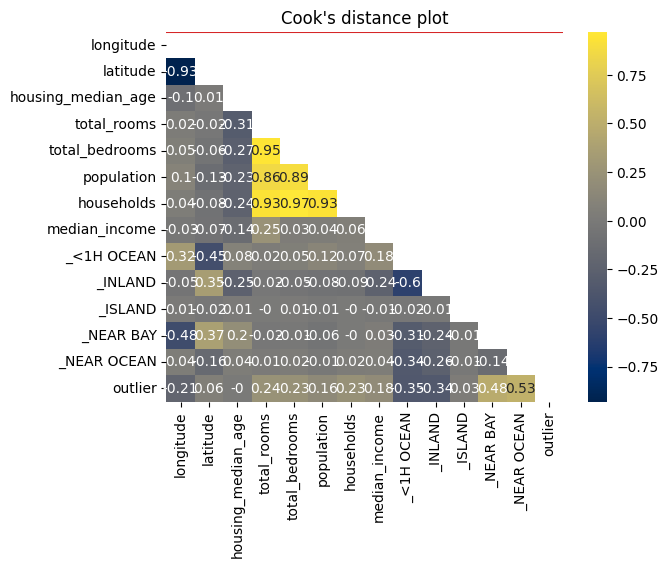

In [79]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

inf=influence(model)
(i, d) = inf.cooks_distance
plt.title("Cook's distance plot")
plt.stem(np.arange(len(i)), i, markerfmt=",")
plt.show()

From Cook’s plot, we can understand which are the observations we need to pay more attention to and decide whether to drop them or not. (As a rule, the observation has a high influence if the Cook’s distance is greater than 4/N-k-1 ( N=number of observations, k= number of predictors, yellow horizontal line in the plot)

### BONUS: Influence plot

Influence plots show the studentized residuals versus the leverage of each observation as measured by the hat matrix.

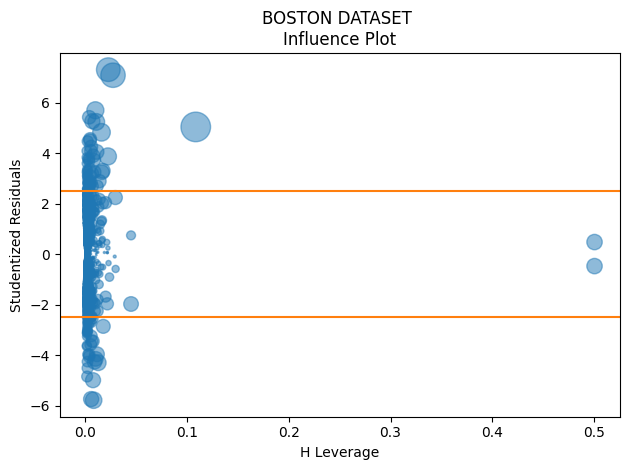

In [80]:
from statsmodels.stats.outliers_influence import OLSInfluence 
influence = OLSInfluence(model)
fig, ax = plt.subplots()
ax.axhline(-2.5, linestyle='-', color='C1')
ax.axhline(2.5, linestyle='-', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
 s=1000 * np.sqrt(influence.cooks_distance[0]),
 alpha=0.5)
ax.set_xlabel('H Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title("BOSTON DATASET \nInfluence Plot")
plt.tight_layout()
plt.show()

In the dataset we can see that some data points have low leverage but large or low residuals. These highly influential data points need a delicate evaluation before including in the model.